In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
from scipy.stats import linregress
from netCDF4 import Dataset
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy
import os
import warnings
import itertools
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import tqdm
warnings.filterwarnings("ignore")

### Fig S2 uncertainty for one example day

In [3]:
days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]

cs2_cpom = Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2_CPOM_full.nc')['Uncertainty'][3681]
cs2_larm = Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2_LARM_full.nc')['Uncertainty'][3681]
cs2s3_cpom = Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_CPOM_full.nc')['Uncertainty'][3681]
cs2s3_larm = Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_LARM_full.nc')['Uncertainty'][3681]

cpom_diff = cs2s3_cpom - cs2_cpom
larm_diff = cs2s3_larm - cs2_larm
cs2_diff = cs2_cpom - cs2_larm
cs2s3_diff = cs2s3_cpom - cs2s3_larm

print(dates[3681])

2020-01-30


CS2_CPOM  mean:  0.21862677317032114
CS2_LARM  mean:  0.19781031445144348
CS2_CPOM - CS2_LARM  mean:  0.02081645871887763
CS2S3_CPOM  mean:  0.3109313887799584
CS2S3_LARM  mean:  0.24767557508057578
CS2S3_CPOM - CS2S3_LARM  mean:  0.06325581369938262
CS2S3_CPOM - CS2_CPOM  mean:  0.09230461560963726
CS2S3_LARM - CS2_LARM  mean:  0.04986526062913228


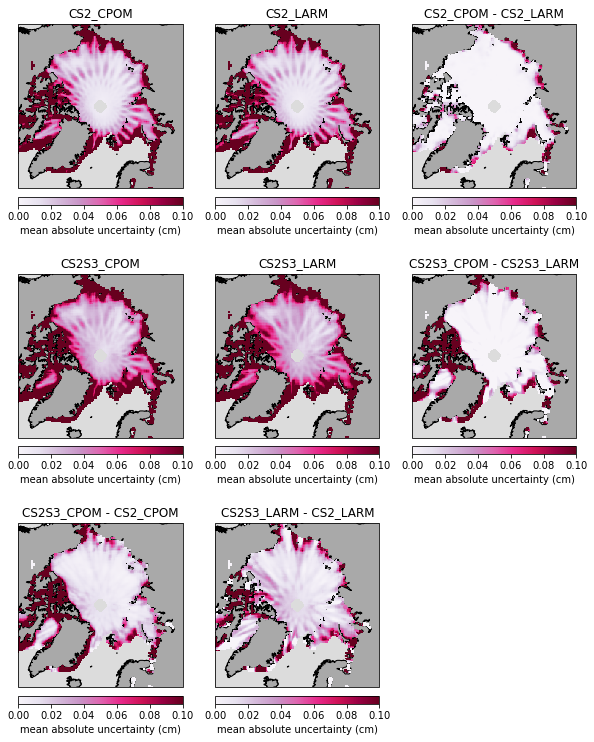

In [5]:
lat = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/new_lat_25km.npy')
lats = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/lat_25km.npy')
lons = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/lon_25km.npy')
means = [cs2_cpom,cs2_larm,cs2_diff,cs2s3_cpom,cs2s3_larm, cs2s3_diff,cpom_diff, larm_diff]
titles = ['CS2_CPOM','CS2_LARM','CS2_CPOM - CS2_LARM','CS2S3_CPOM','CS2S3_LARM','CS2S3_CPOM - CS2S3_LARM', 'CS2S3_CPOM - CS2_CPOM', 'CS2S3_LARM - CS2_LARM']

fig = plt.figure(figsize=(10,13))
spec = gridspec.GridSpec(ncols=3, nrows=3,wspace=0.2,hspace=0.2)

for counter, ax in enumerate(means):
    fb = means[counter]
    fb[lat>88] = np.nan
    print(titles[counter], ' mean: ' ,np.nanmean(fb*100))
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.coastlines()
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,fb*100,vmin=0,vmax=0.1,cmap='PuRd',transform=ccrs.PlateCarree())
    a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.04) 
    a.set_label('mean absolute uncertainty (cm)',fontsize='medium')
    ax.set_title(titles[counter],fontsize='large', pad=7)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/uncertainties.png',bbox_inches = "tight")

### Fig S3 GPOD uncertainty

In [14]:
days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=int(days)) for days in days]
dates[3564]

datetime.date(2019, 10, 5)

In [15]:
cs2s3_cpom = Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_CPOM_full.nc')['Uncertainty'][3564]
cs2_gpod = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/FB_uncertainty_2019-2020_25km_20191005.npy')
lats = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/new_lat_25km.npy')
cs2s3_cpom[lats>88] = np.nan
diff_gpod = cs2s3_cpom - cs2_gpod

2010-01-05
CS2 GPOD  mean:  0.2327093901277534
CS2S3_CPOM  mean:  0.23319124854886653
CS2S3_CPOM - CS2 GPOD  mean:  -1.1360119211926154e-18


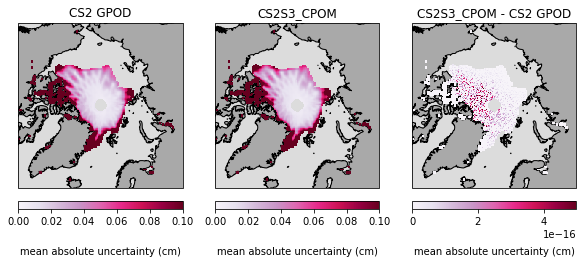

In [16]:
date = dates[4]
lats = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/lat_25km.npy') # grid edges
lons = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/lon_25km.npy')
means = [cs2_gpod,cs2s3_cpom,diff_gpod]
titles = ['CS2 GPOD','CS2S3_CPOM','CS2S3_CPOM - CS2 GPOD']

fig = plt.figure(figsize=(10,12))
spec = gridspec.GridSpec(ncols=3, nrows=1,wspace=0.2,hspace=0.2)

vmaxs = [0.1,0.1,0.0000000000000005]

for counter, ax in enumerate(means):
    fb = means[counter]
    if counter == 0:
        print(date)
    print(titles[counter], ' mean: ' ,np.nanmean(fb*100))
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.coastlines()
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,fb*100,cmap='PuRd',vmin=0,vmax=vmaxs[counter],transform=ccrs.PlateCarree())
    a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.02) 
    a.set_label('mean absolute uncertainty (cm)',fontsize='medium',labelpad=20)
    ax.set_title(titles[counter],fontsize='large', pad=7)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/uncertainties_gpod.png',bbox_inches = "tight")